# Table of Contents
 <p>

In [1]:
#configure plotting
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib;matplotlib.rcParams['figure.figsize'] = (8,5)
from matplotlib import pyplot as plt

In [24]:
import GPy
import numpy as np

In [3]:
ker1 = GPy.kern.RBF(1)  # Equivalent to ker1 = GPy.kern.rbf(input_dim=1, variance=1., lengthscale=1.)
ker2 = GPy.kern.RBF(input_dim=1, variance = .75, lengthscale=2.)
ker3 = GPy.kern.RBF(1, .5, .5)

In [4]:
print(ker2)

  rbf.         |  value  |  constraints  |  priors
  variance     |   0.75  |      +ve      |        
  lengthscale  |    2.0  |      +ve      |        


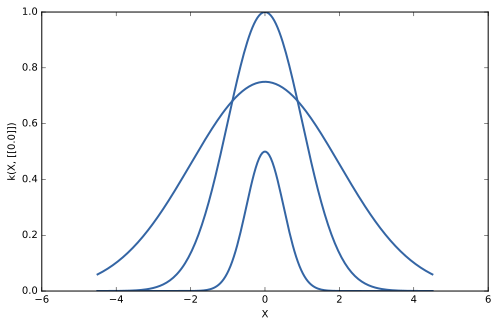

In [5]:
_ = ker1.plot(ax=plt.gca())
_ = ker2.plot(ax=plt.gca())
_ = ker3.plot(ax=plt.gca())

 /Users/imolk/bin/venv_python3/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


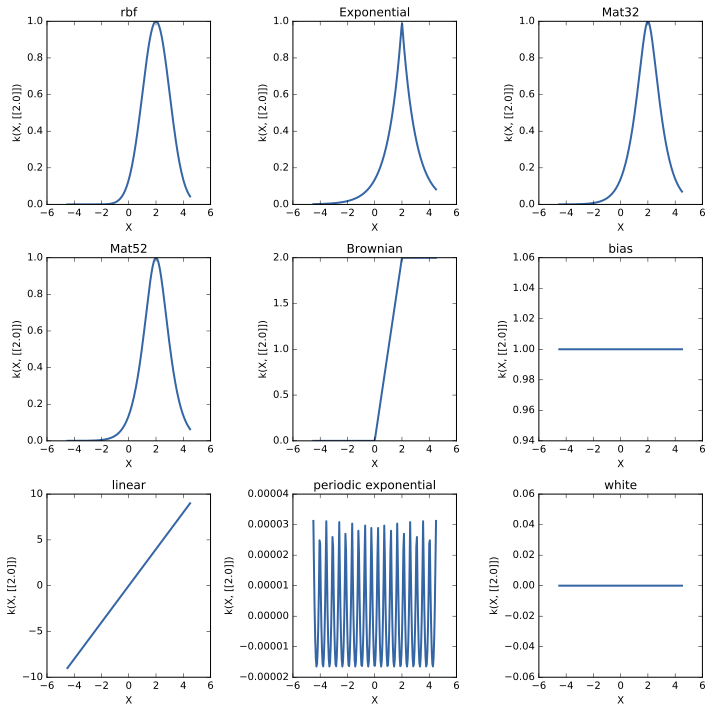

In [6]:
figure, axes = plt.subplots(3,3, figsize=(10,10), tight_layout=True)
kerns = [GPy.kern.RBF(1), GPy.kern.Exponential(1), GPy.kern.Matern32(1), 
    GPy.kern.Matern52(1), GPy.kern.Brownian(1), GPy.kern.Bias(1), 
    GPy.kern.Linear(1), GPy.kern.PeriodicExponential(1, period=0.05), GPy.kern.White(1)]
for k,a in zip(kerns, axes.flatten()):
    k.plot(ax=a, x=2)
    a.set_title(k.name.replace('_', ' '))

  mul.               |  value  |  constraints  |  priors
  rbf.variance       |    1.0  |      +ve      |        
  rbf.lengthscale    |    2.0  |      +ve      |        
  Mat32.variance     |    0.5  |      +ve      |        
  Mat32.lengthscale  |    0.2  |      +ve      |        
  sum.               |  value  |  constraints  |  priors
  rbf.variance       |    1.0  |      +ve      |        
  rbf.lengthscale    |    2.0  |      +ve      |        
  Mat32.variance     |    0.5  |      +ve      |        
  Mat32.lengthscale  |    0.2  |      +ve      |        


 /Users/imolk/bin/venv_python3/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


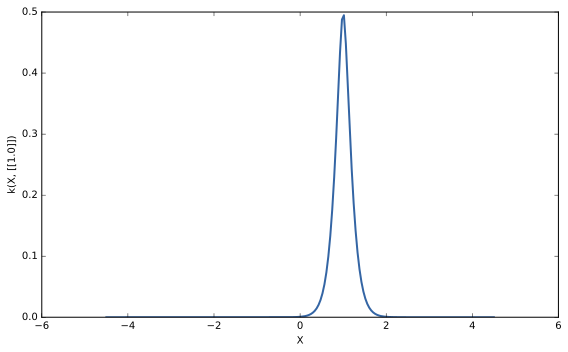

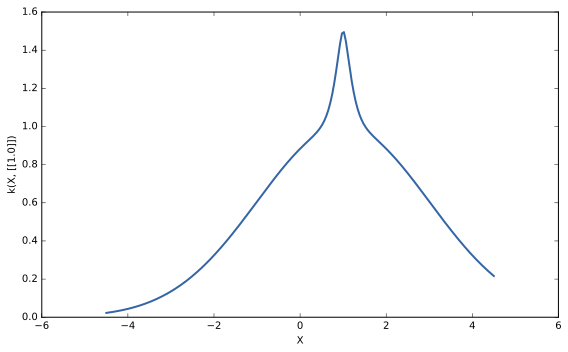

In [7]:
# Product of kernels
k1 = GPy.kern.RBF(1,1.,2.)
k2 = GPy.kern.Matern32(1, 0.5, 0.2)
k_prod = k1 *k2
print(k_prod)
k_prod.plot()

# Sum of kernels
k1 = GPy.kern.RBF(1,1.,2.)
k2 = GPy.kern.Matern32(1, 0.5, 0.2)
k_add = k1 + k2
print(k_add)
k_add.plot()

In [17]:
k1

rbf.,value,constraints,priors
variance,10.0,+ve,
lengthscale,2.0,+ve,


In [21]:
k_add.rbf.variance = 10.
print(k1, "\n")
k_add.rbf.variance = 12.
print(k1)

  rbf.         |  value  |  constraints  |  priors
  variance     |   10.0  |      +ve      |        
  lengthscale  |    2.0  |      +ve      |         

  rbf.         |  value  |  constraints  |  priors
  variance     |   12.0  |      +ve      |        
  lengthscale  |    2.0  |      +ve      |        


 /Users/imolk/bin/venv_python3/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


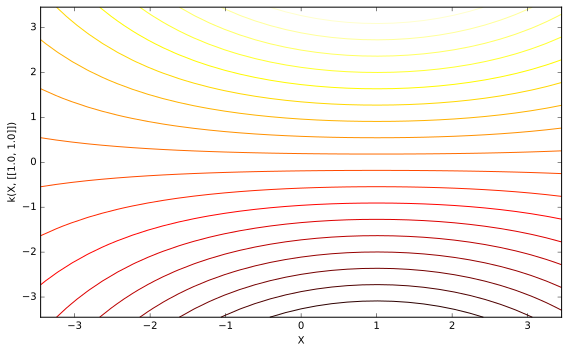

In [47]:
k1 = GPy.kern.Linear(input_dim=1, active_dims=[0]) # works on the first column of X, index=0
k2 = GPy.kern.ExpQuad(input_dim=1, lengthscale=3, active_dims=[1]) # works on the second column of X, index=1
k = k1 * k2
k.plot(x=np.ones((1,2)))

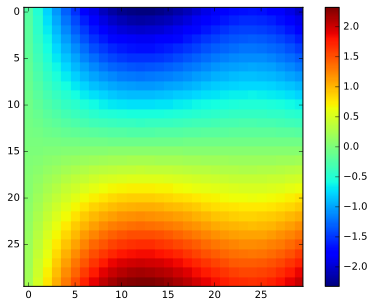

In [49]:
def plot_sample(k):
    xx, yy = np.mgrid[-3:3:30j, -3:3:30j]
    X = np.vstack((xx.flatten(), yy.flatten())).T
    K = k.K(X)+np.eye(X.shape[0])*1e-10
    s = np.random.multivariate_normal(np.zeros(X.shape[0]), K)
#     plt.contourf(xx, yy, s.reshape(*xx.shape), cmap=plt.cm.hot)
    plt.imshow(s.reshape(*xx.shape), interpolation='nearest')
    plt.colorbar()
plot_sample(k)

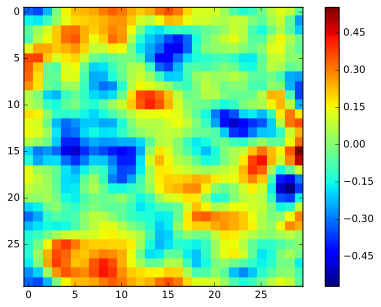

In [50]:
k1 = GPy.kern.PeriodicExponential(input_dim=1, active_dims=[0], period=6, lower=-10, upper=10) + GPy.kern.Bias(1, variance=0, active_dims=[0])
k2 = GPy.kern.PeriodicExponential(input_dim=1, active_dims=[1], period=8, lower=-10, upper=10) + GPy.kern.Bias(1, variance=0, active_dims=[0])
#k2 = GPy.kern.ExpQuad(1, active_dims=[1])
k = k1 * k2
plot_sample(k)

In [75]:
?GPy.kern.PeriodicMatern32

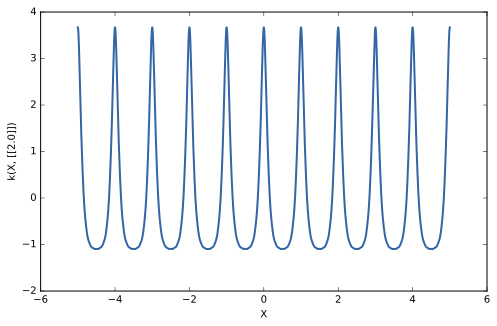

In [84]:
k=GPy.kern.PeriodicMatern32(input_dim=1, active_dims=[0], variance=100.0, period=1.0, lower=-10, upper=10, lengthscale=0.1)
k.plot_covariance(ax=plt.gca(),x=2, plot_limits=(-5,5), resolution=10000)